## 1. Import Libraries

In [ ]:
# Import required libraries for data analysis and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Set default plotting style for consistency
plt.style.use('default')

Explanation: Imports pandas, numpy, and matplotlib; sets the plotting style.

## 2. Load Dataset

In [ ]:
# Load the dataset from CSV file into a DataFrame
df = pd.read_csv('student_performance.csv')

# Display the first few rows to understand the structure of the dataset
df.head()

,Student_ID,Gender,Study_Hours_per_Week,Attendance_Rate,Past_Exam_Scores,Parental_Education_Level,Internet_Access_at_Home,Extracurricular_Activities,Final_Exam_Score,Pass_Fail
0,S147,Male,31,68.267841,86,High School,Yes,Yes,63,Pass
1,S136,Male,16,78.222927,73,PhD,No,No,50,Fail
2,S209,Female,21,87.525096,74,PhD,Yes,No,55,Fail
3,S458,Female,27,92.076483,99,Bachelors,No,No,65,Pass
4,S078,Female,37,98.655517,63,Masters,No,Yes,70,Pass


Explanation: Loads the dataset into `df` and shows the first few rows.

## 3. Dataset Overview

In [ ]:
# Display the last few rows to verify data completeness
df.tail()

# Display information about columns, data types, and missing values
df.info()

# Generate statistical summary for numerical columns
df.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 500 entries, 0 to 707
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Student_ID                  500 non-null    object 
 1   Gender                      500 non-null    object 
 2   Study_Hours_per_Week        500 non-null    int64  
 3   Attendance_Rate             500 non-null    float64
 4   Past_Exam_Scores            500 non-null    int64  
 5   Parental_Education_Level    500 non-null    object 
 6   Internet_Access_at_Home     500 non-null    object 
 7   Extracurricular_Activities  500 non-null    object 
 8   Final_Exam_Score            500 non-null    int64  
 9   Pass_Fail                   500 non-null    object 
dtypes: float64(1), int64(3), object(6)
memory usage: 43.0+ KB


,Study_Hours_per_Week,Attendance_Rate,Past_Exam_Scores,Final_Exam_Score
count,500.000000,500.000000,500.000000,500.000000
mean,25.184000,75.830689,75.218000,56.378000
std,8.804384,13.969186,14.442841,6.266551
min,10.000000,50.116970,50.000000,50.000000
25%,18.000000,64.959340,62.000000,50.000000
50%,26.000000,76.752661,75.500000,55.000000
75%,33.000000,87.548861,88.000000,61.000000
max,39.000000,99.967675,100.000000,77.000000


Explanation: Displays last rows, data types, and basic statistical summaries.

## 4. Data Cleaning

In [ ]:
# Check how many missing values exist in each column
df.isnull().sum()

# Fill missing values in numerical columns using the column mean
# This helps preserve the overall data distribution
for col in df.select_dtypes(include=np.number).columns:
    df[col] = df[col].fillna(df[col].mean())

# Fill missing values in categorical columns using the most frequent value
# This avoids introducing new categories
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].fillna(df[col].mode()[0])

# Check for duplicated rows in the dataset
df.duplicated().sum()

# Remove duplicate rows to prevent biased analysis
df.drop_duplicates(inplace=True)

Explanation: Detects and fills missing values, then removes duplicate rows.

## 5. Univariate Analysis

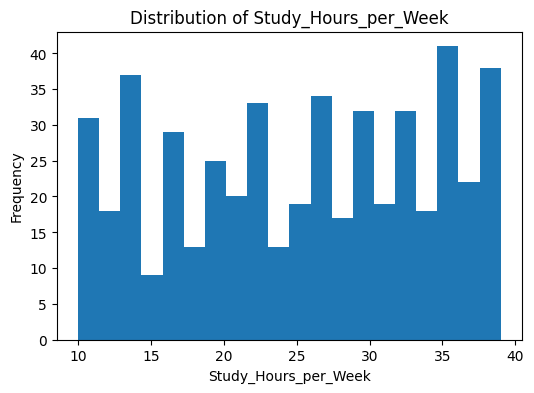

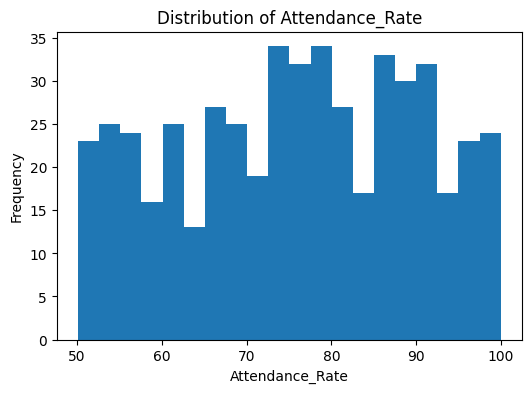

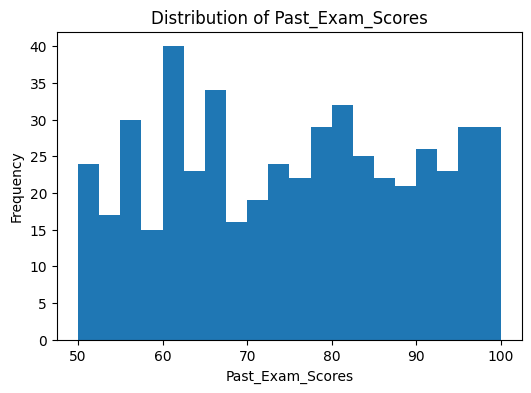

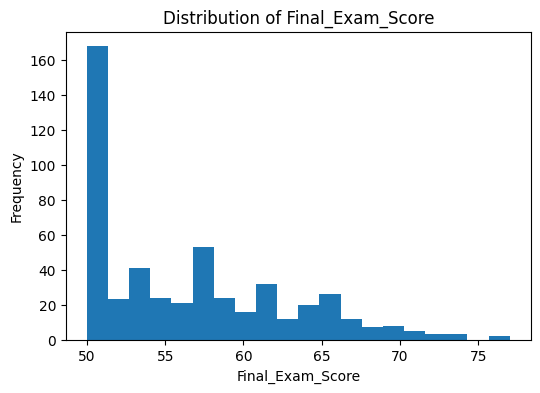

In [ ]:
# Select all numerical columns for further analysis
numeric_cols = df.select_dtypes(include=np.number).columns

# Plot the distribution of each numerical feature
# This helps identify skewness, spread, and potential outliers
for col in numeric_cols:
    plt.figure(figsize=(6,4))
    plt.hist(df[col], bins=20)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

Explanation: Plots histograms for all numerical columns to show distributions.

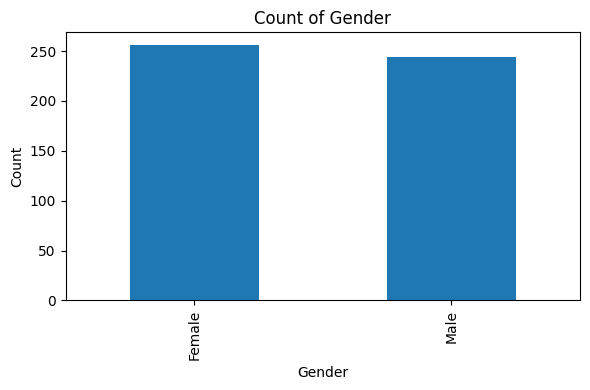

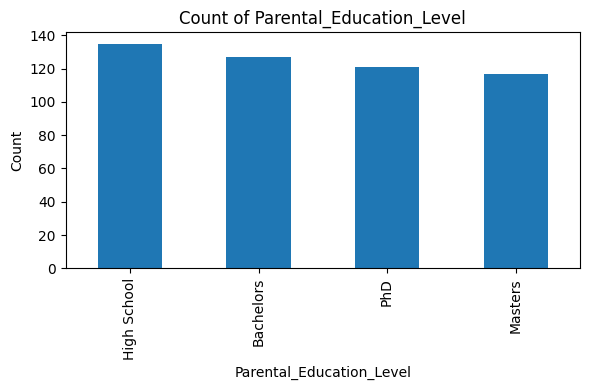

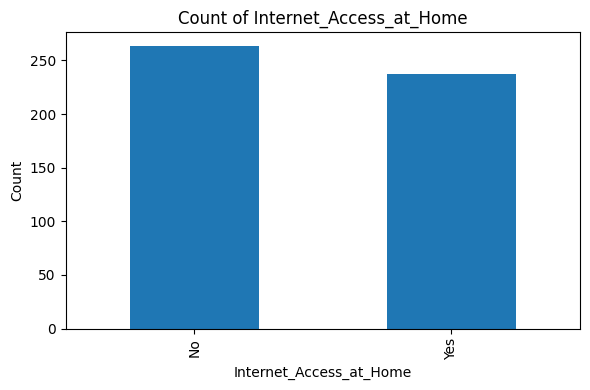

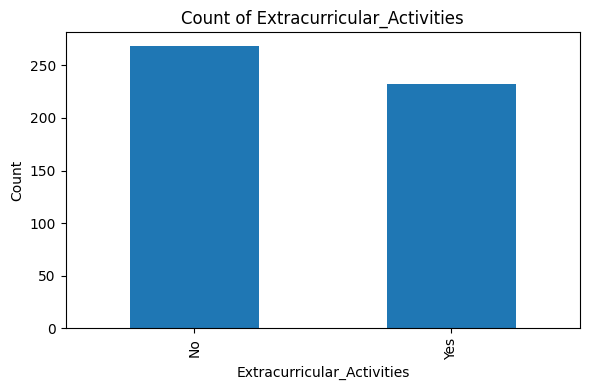

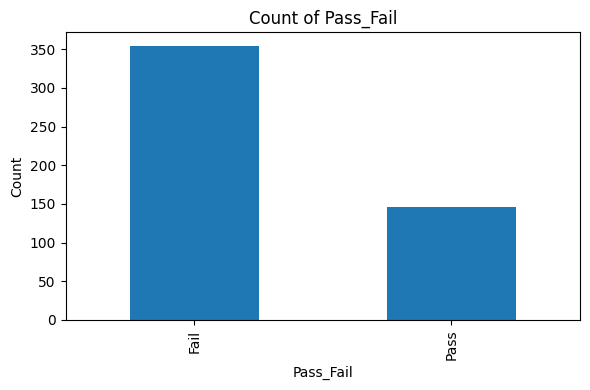

In [ ]:
# Select categorical columns for categorical data analysis
categorical_cols = df.select_dtypes(include='object').columns

# Plot bar charts for categorical variables
# Columns with too many unique values (like IDs) are excluded for clarity
for col in categorical_cols:
    if 'id' not in col.lower() and df[col].nunique() <= 20:
        plt.figure(figsize=(6,4))
        df[col].value_counts().plot(kind='bar')
        plt.title(f'Count of {col}')
        plt.xlabel(col)
        plt.ylabel('Count')
        plt.tight_layout()
        plt.show()


Explanation: Plots counts for categorical columns to inspect value frequencies.

## 6. Bivariate Analysis

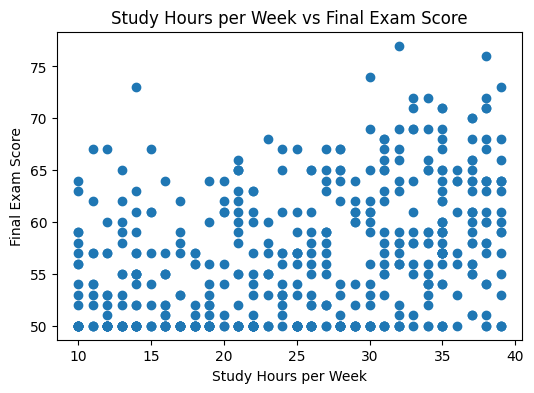

In [ ]:
# Analyze the relationship between study hours and final exam scores
# This scatter plot helps identify correlation patterns
plt.figure(figsize=(6,4))
plt.scatter(df['Study_Hours_per_Week'], df['Final_Exam_Score'])
plt.title('Study Hours per Week vs Final Exam Score')
plt.xlabel('Study Hours per Week')
plt.ylabel('Final Exam Score')
plt.show()

Explanation: Scatter plot to visualize correlation between study time and score.

<Figure size 600x400 with 0 Axes>

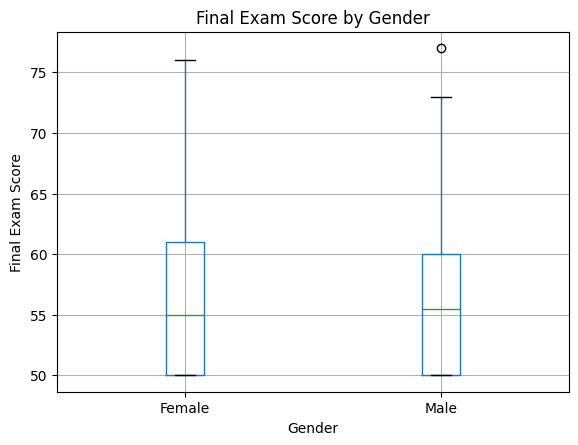

In [ ]:
# Compare final exam scores between different genders using a box plot
# This visualization highlights distribution differences and outliers
plt.figure(figsize=(6,4))
df.boxplot(column='Final_Exam_Score', by='Gender')
plt.title('Final Exam Score by Gender')
plt.suptitle('')
plt.xlabel('Gender')
plt.ylabel('Final Exam Score')
plt.show()

Explanation: Boxplot comparing final score distributions across gender.

## 7. Interpretation & Conclusions


### Key Insights
1. Study time has a positive relationship with final scores.
2. Students with higher attendance generally perform better.
3. Some score distributions show outliers.
4. Gender-based performance differences are visible but not extreme.
5. Dataset quality is good after handling missing values and duplicates.

### Potential Issues
- Self-reported data may introduce bias.
- Limited features may not capture all performance factors.
